<center>UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE</center>
<center>CENTRO DE TECNOLOGIA</center>
<center>DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO</center>
<center>DISCIPLINA DE PROCESSAMENTO DIGITAL DE SINAIS</center>

<b>ALUNO:</b>  Eric Calasans de Barros 

<b>MAT.:  </b>20170155390

<b>PROF.:  </b>Pedro Yochinori Gushiken

<center><h1><b>PROVA - 2ª UNIDADE</b></h1></center>

<h3>Questão 1:</h3>

<h3>a)</h3>


Sejam os sinais $x_{a}(t) = sen(2 \pi f_{1} t) + sen(2 \pi f_{2} t) + sen(2 \pi f_{3} t)$ e $x_{2}$ tal que:
* $3 sen(2 \pi f_{1} t)$, se $0 \leq t < 1$
* $3 sen(2 \pi f_{2} t)$, se $1 \leq t < 2$
* $3 sen(2 \pi f_{3} t)$, se $2 \leq t < \infty$


Conforme instruções dadas no escopo da prova, os valores de $f_{1}, f_{2}$ e $f_{3}$ são, respectivamente, para $a = 5, b = 3$ e $c = 9$:

$$f_{1} = a = 5Hz$$

$$f_{2} = 10a + b = 10.5 + 3 = 53Hz$$

$$f_{3} = 100a + 10b + c = 100.5 + 10.3 + 9 = 539Hz$$

Assim, temos que os seguintes sinais:
$$x_{a}(t) = sen(2 \pi .5 t) + sen(2 \pi .53 t) + sen(2 \pi .539 t) = sen(10 \pi t) + sen(106 \pi t) + sen(1078 \pi t)$$

E:
* $3 sen(10 \pi t)$, se $0 \leq t < 1$
* $3 sen(106 \pi t)$, se $1 \leq t < 2$
* $3 sen(1078 \pi t)$, se $2 \leq t < \infty$

Ainda, segundo dados da prova, ambos os sinais foram amostrados a uma frequência de <b>10.000Hz</b> durante <b>3s</b>.  Dessa forma, cada amostra foi obtida a cada <b>$10^{-4}$s</b> e, em tempo discreto, obtemos $x_{1}[n]$:

$$x_{1}[n] = sen(10 \pi n) + sen(106 \pi n) + sen(1078 \pi n)$$ 

 e $x_{2}[n]:$

* $3 sen(10 \pi t)$, se $0 \leq n < 10000 $
* $3 sen(106 \pi t)$, se $10000 \leq n < 20000$
* $3 sen(1078 \pi t)$, se $20000 \leq n < 30000$

Utilizando a linguagem Python e suas bibliotecas, produzimos as sequências $x_{1}[n]$ e $x_{2}[n]$ conforme demonstrado a seguir:

In [1]:
import numpy as np
from ThinkDSP import thinkdsp, thinkplot # Bibliotecas para PDS(https://github.com/AllenDowney/ThinkDSP)
import scipy
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DOIS_PI = 2 * math.pi
FREQ_AMOSTRAGEM = 10000 # Em Hz
PERIODO_AMOSTRAGEM = 1/FREQ_AMOSTRAGEM

# Frequências calculadas conforme a matrícula
freq1 = 5 * DOIS_PI
freq2  = 53 * DOIS_PI
freq3 = 539 * DOIS_PI

# Senóides 
x11_t = thinkdsp.SinSignal(freq1)
x12_t = thinkdsp.SinSignal(freq2)
x13_t = thinkdsp.SinSignal(freq3)

# Sequências x1_n e x2_n
x1_t = x11_t + x12_t + x13_t

x1_n = x1_t.make_wave(duration=3, start=0, framerate=FREQ_AMOSTRAGEM)

x21_t = thinkdsp.SinSignal(freq1, amp=3)
x22_t = thinkdsp.SinSignal(freq2, amp=3)
x23_t = thinkdsp.SinSignal(freq3, amp=3)

w21_n = x21_t.make_wave(duration=1, start=0, framerate=FREQ_AMOSTRAGEM) 
w22_n = x22_t.make_wave(duration=1, start=1, framerate=FREQ_AMOSTRAGEM)
w23_n = x23_t.make_wave(duration=1, start=2, framerate=FREQ_AMOSTRAGEM)

x2_n = (w21_n + w22_n + w23_n)

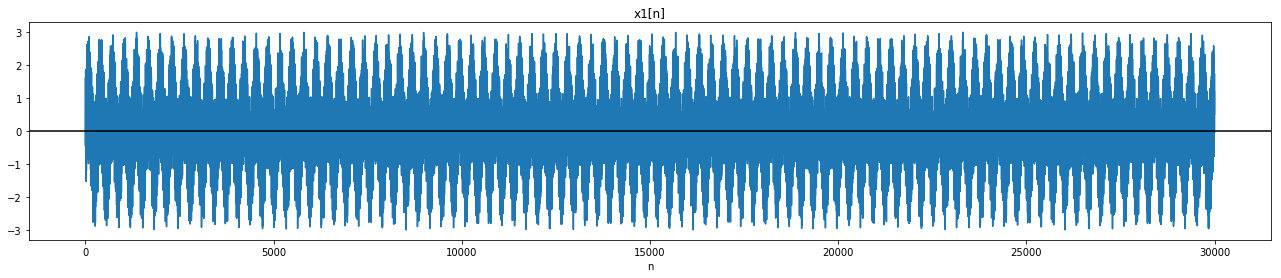

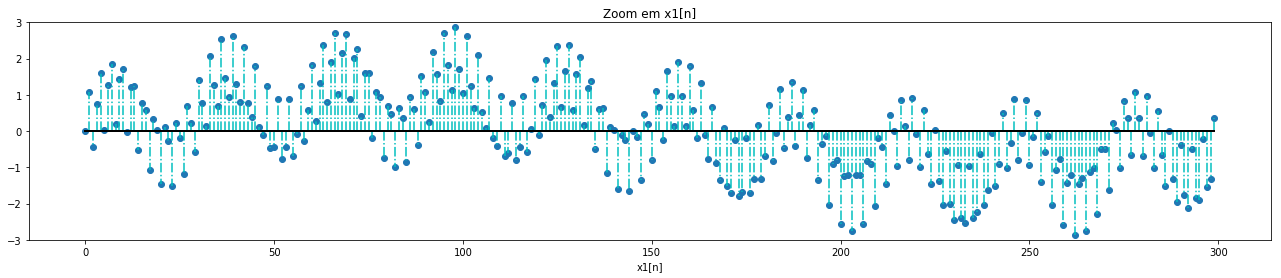

In [3]:
# Gráficos
# x1_n
plt.title('x1[n]')
plt.plot(x1_n.ts*10000, x1_n.ys)
plt.xlabel('n')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=3)
plt.show()

#Detalhe
x1Det_k = x1_n.ts[range(0, 300)]
x1Det_y = x1_n.ys[range(0, 300)]

markerline, stemlines, baseline = plt.stem(x1Det_k*10000, x1Det_y, 'c-.')
plt.setp(baseline, color='k', linewidth=2)
plt.ylim(-3,3)
plt.xlabel('x1[n]')
plt.subplots_adjust(right=3)
plt.title('Zoom em x1[n]')
plt.show()


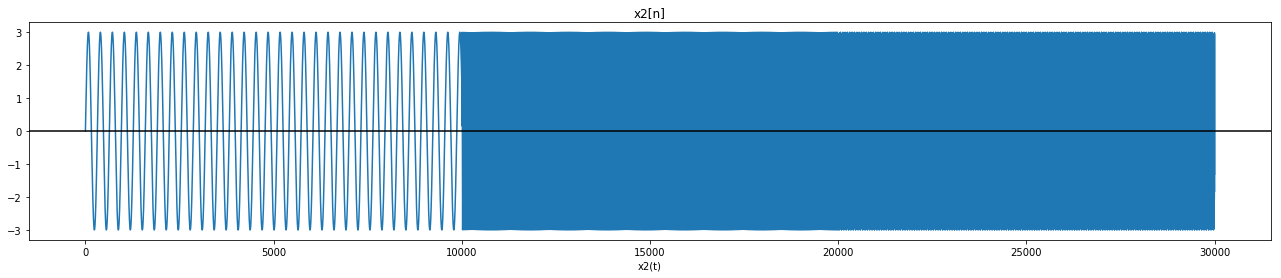

In [4]:
# x2_n
plt.title('x2[n]')
plt.plot(x2_n.ts*10000, x2_n.ys)
plt.xlabel('x2(t)')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=3)

plt.show()

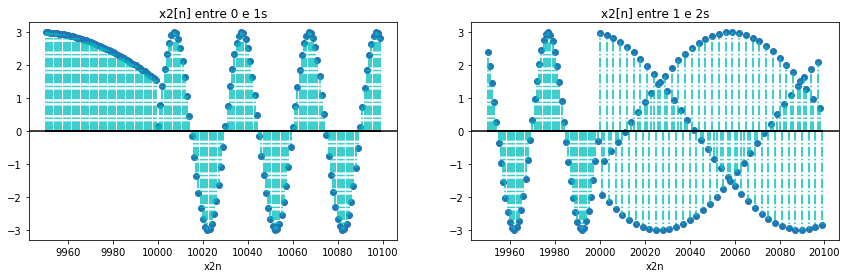

In [5]:
#Detalhe
x2Det_01_k = x2_n.ts[range(9950, 10100)]
x2Det_01_y = x2_n.ys[range(9950, 10100)]

x2Det_12_k = x2_n.ts[range(19950, 20100)]
x2Det_12_y = x2_n.ys[range(19950, 20100)]

plt.subplot(1,2,1)
m, s, b = plt.stem(x2Det_01_k*10000, x2Det_01_y, 'c-.')
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 0 e 1s')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
m, s, b = plt.stem(x2Det_12_k*10000, x2Det_12_y, 'c-.')
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 1 e 2s')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=2)
plt.show()

<h3>b)</h3>

Sejam:

* $\Omega_{1} = 2 \pi f_{1} = 10 \pi$
* $\Omega_{2} = 2 \pi f_{2} = 106 \pi$
* $\Omega_{3} = 2 \pi f_{3} = 1078 \pi$

Sejam também 
$$X(\Omega) = \sum_{n = -\infty}^{\infty}x[n] e^{-j \Omega n}$$
a <b>equação de análise</b> da DTFT,
$$sen(\Omega n) = \frac{e^{j \Omega n} - e^{-j \Omega n}}{2j}$$
e a soma dos termos de uma <b>série geométrica</b> dada por
$$\sum_{n = 0}^{N} = \frac{1 - r^{N + 1}}{1 - r}$$
podemos deduzir a fórmula analítica para $X_{1}(\Omega)$ e $X_{2}(\Omega)$, para o intervalo de 0 a N-1:
$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[sen(\Omega_{1} \pi t) + sen(\Omega_{2} \pi t) + sen(\Omega_{3} \pi t)] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[sen(\Omega_{1} \pi t)]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[sen(\Omega_{2} \pi t)]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[sen(\Omega_{3} \pi t)] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{1} n} - e^{-j \Omega_{1} n}}{2j}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{2} n} - e^{-j \Omega_{2} n}}{2j}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{3} n} - e^{-j \Omega_{3} n}}{2j}] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}[e^{j \Omega_{1} n} - e^{-j \Omega_{1} n}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[e^{j \Omega_{2} n} - e^{-j \Omega_{2} n}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[e^{j \Omega_{3} n} - e^{-j \Omega_{3} n}] e^{-j \Omega n} \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{1} - \Omega)} - e^{-jn (\Omega_{1} + \Omega)}] + \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{2} - \Omega)} - e^{-jn (\Omega_{2} + \Omega)}] + \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{3} - \Omega)} - e^{-jn (\Omega_{3} + \Omega)}] \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{1} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{1} - \Omega)} \bigg]^{n} + \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{2} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{2} - \Omega)} \bigg]^{n} + \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{3} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{3} - \Omega)} \bigg]^{n} \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{1} - \Omega)}}{1 - e^{j(\Omega_{1} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{1} + \Omega)}}{1 - e^{-j(\Omega_{1} + \Omega)}} + \frac{1 - e^{jN(\Omega_{2} - \Omega)}}{1 - e^{j(\Omega_{2} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{2} + \Omega)}}{1 - e^{-j(\Omega_{2} + \Omega)}} + \frac{1 - e^{jN(\Omega_{3} - \Omega)}}{1 - e^{j(\Omega_{3} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{3} + \Omega)}}{1 - e^{-j(\Omega_{3} + \Omega)}}\Bigg\}$$

Para $X_{2}(\Omega)$:
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{1} - \Omega)}}{1 - e^{j(\Omega_{1} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{1} + \Omega)}}{1 - e^{-j(\Omega_{1} + \Omega)}} \Bigg\}$, para $0 \leq n < 10.000$
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{2} - \Omega)}}{1 - e^{j(\Omega_{2} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{2} + \Omega)}}{1 - e^{-j(\Omega_{2} + \Omega)}} \Bigg\}$, para $10.000 \leq n < 20.000$
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{3} - \Omega)}}{1 - e^{j(\Omega_{3} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{3} + \Omega)}}{1 - e^{-j(\Omega_{3} + \Omega)}} \Bigg\}$, para $20.000 \leq n < 30.000$

<h3>c)</h3>

Pela definição da <i>Transformada Discreta de Fourier(DFT)</i>, temos que:
$$X[k] = X(k \Omega_{0}) = \sum_{n = 0}^{N - 1} x[n] e^{-jk \Omega_{0} n}$$

Considerando $N = 30000$ pontos para a DFT, temos uma resolução de frequência $\Omega_{0}$ tal que:
$$\Omega_{0} = \frac{2 \pi}{N} = \frac{2 \pi}{30000} = \frac{\pi}{15000}$$

O código abaixo mostra a utilização da biblioteca <b>numpy.fft.fft</b> para o cálculo dos espectros de $x_{1}[n]$ e $x_{2}[n]$:


In [6]:
# Calcula o x1 para 3s
x1_n = x1_t.make_wave(duration=3, start=0, framerate=FREQ_AMOSTRAGEM)

# Tamanho do sinal
tam_x1_n = len(x1_n)
tam_x2_n = len(x2_n)

# Resolução de frequência para 30000 pontos
Omega0 = DOIS_PI/30000

# Intervalo de frequências
OmegaX1 = np.arange(0, tam_x1_n) * Omega0
OmegaX2 = np.arange(0, tam_x2_n) * Omega0

# FFT de x1[n]
x1FFT = np.fft.fft(x1_n.ys)

# FFT de x2[n]
x2FFT = np.fft.fft(x2_n.ys)



<h3>d)</h3> 

O código abaixo implementa um método de cálculo da DTFT baseada na fórmula analítica deduzida no item b):

In [7]:
def DFT(N=0, freqs=[]):
    '''
    Função que calcula a DFT para uma determinada sequência

    :param x_n: sequência x[n]
    :param N: número de pontos desejados para a DFT
    :return: array com os valores da DFT para x[n]
    '''

    # Cálculo da definição da frequência(Omega0)
    Omega0 = DOIS_PI / (N)

    # Inicializa x[k]
    x_k = np.zeros(N, dtype=np.complex_)

    k = np.arange(0, N)

    # Cálculo de x[k]
    somaFreq = 0
    for f in freqs:
        omega = DOIS_PI * f
        fator1 = omega - k*Omega0
        fator2 = omega + k*Omega0
        frac1 = ((np.exp(1j * k[0] * fator1) - np.exp(1j * N * fator1))/(1 - np.exp(1j * fator1)))
        frac2 = ((np.exp(-1j * k[0] * fator2) - np.exp(-1j * N * fator2))/(1 - np.exp(-1j * fator2)))

        somaFreq = somaFreq + ((1/2j) *(frac1 - frac2))

        x_k = somaFreq

    return (x_k, Omega0)

PI = 'π'

frequencias = [freq1, freq2, freq3]

# Cálculo de x1_[k]
X1_k = DFT(len(x1_n), frequencias)

#Cálculo de x2_[k]
parte1 = DFT(10000, [freq1])
parte2 = DFT(10000, [freq2])
parte3 = DFT(10000, [freq3])

X2_k = np.concatenate((parte1[0], parte2[0], parte3[0]), axis=None)



Depois computamos o erro médio entre os valores de $X_{n}[k]$ e $X_{n}(k \Omega_{0})$ com uma precisão de 5 casas decimais:

In [8]:
erro_X1 = x1FFT - X1_k[0]
erro_X2 = x2FFT - X2_k[0]

print("Erro médio em x1:  {0:.5f}".format(np.abs(erro_X1.mean())))
print("Erro médio em x2:  {0:.5f}".format(np.abs(erro_X2.mean())))

Erro médio em x1:  0.00000
Erro médio em x2:  0.34942


Pelo exposto acima, percebemos que, se não houve nenhum erro na computação da fórmula analítica, ambas abordagens concordam mais em $x_{1}$ do que em $x_{2}$ o que, dependendo da aplicação, pode ser significativo ou não.

<h3>e)</h3>
O código abaixo ilustra o uso da biblioteca <b>numpy.fft.ifft</b> para a reconstrução de $x_{1}[n]$ e $x_{2}[n]$ a partir de $X_{1}[k]$ e $X_{2}[k]$, bem como o gráfico reconstruído:


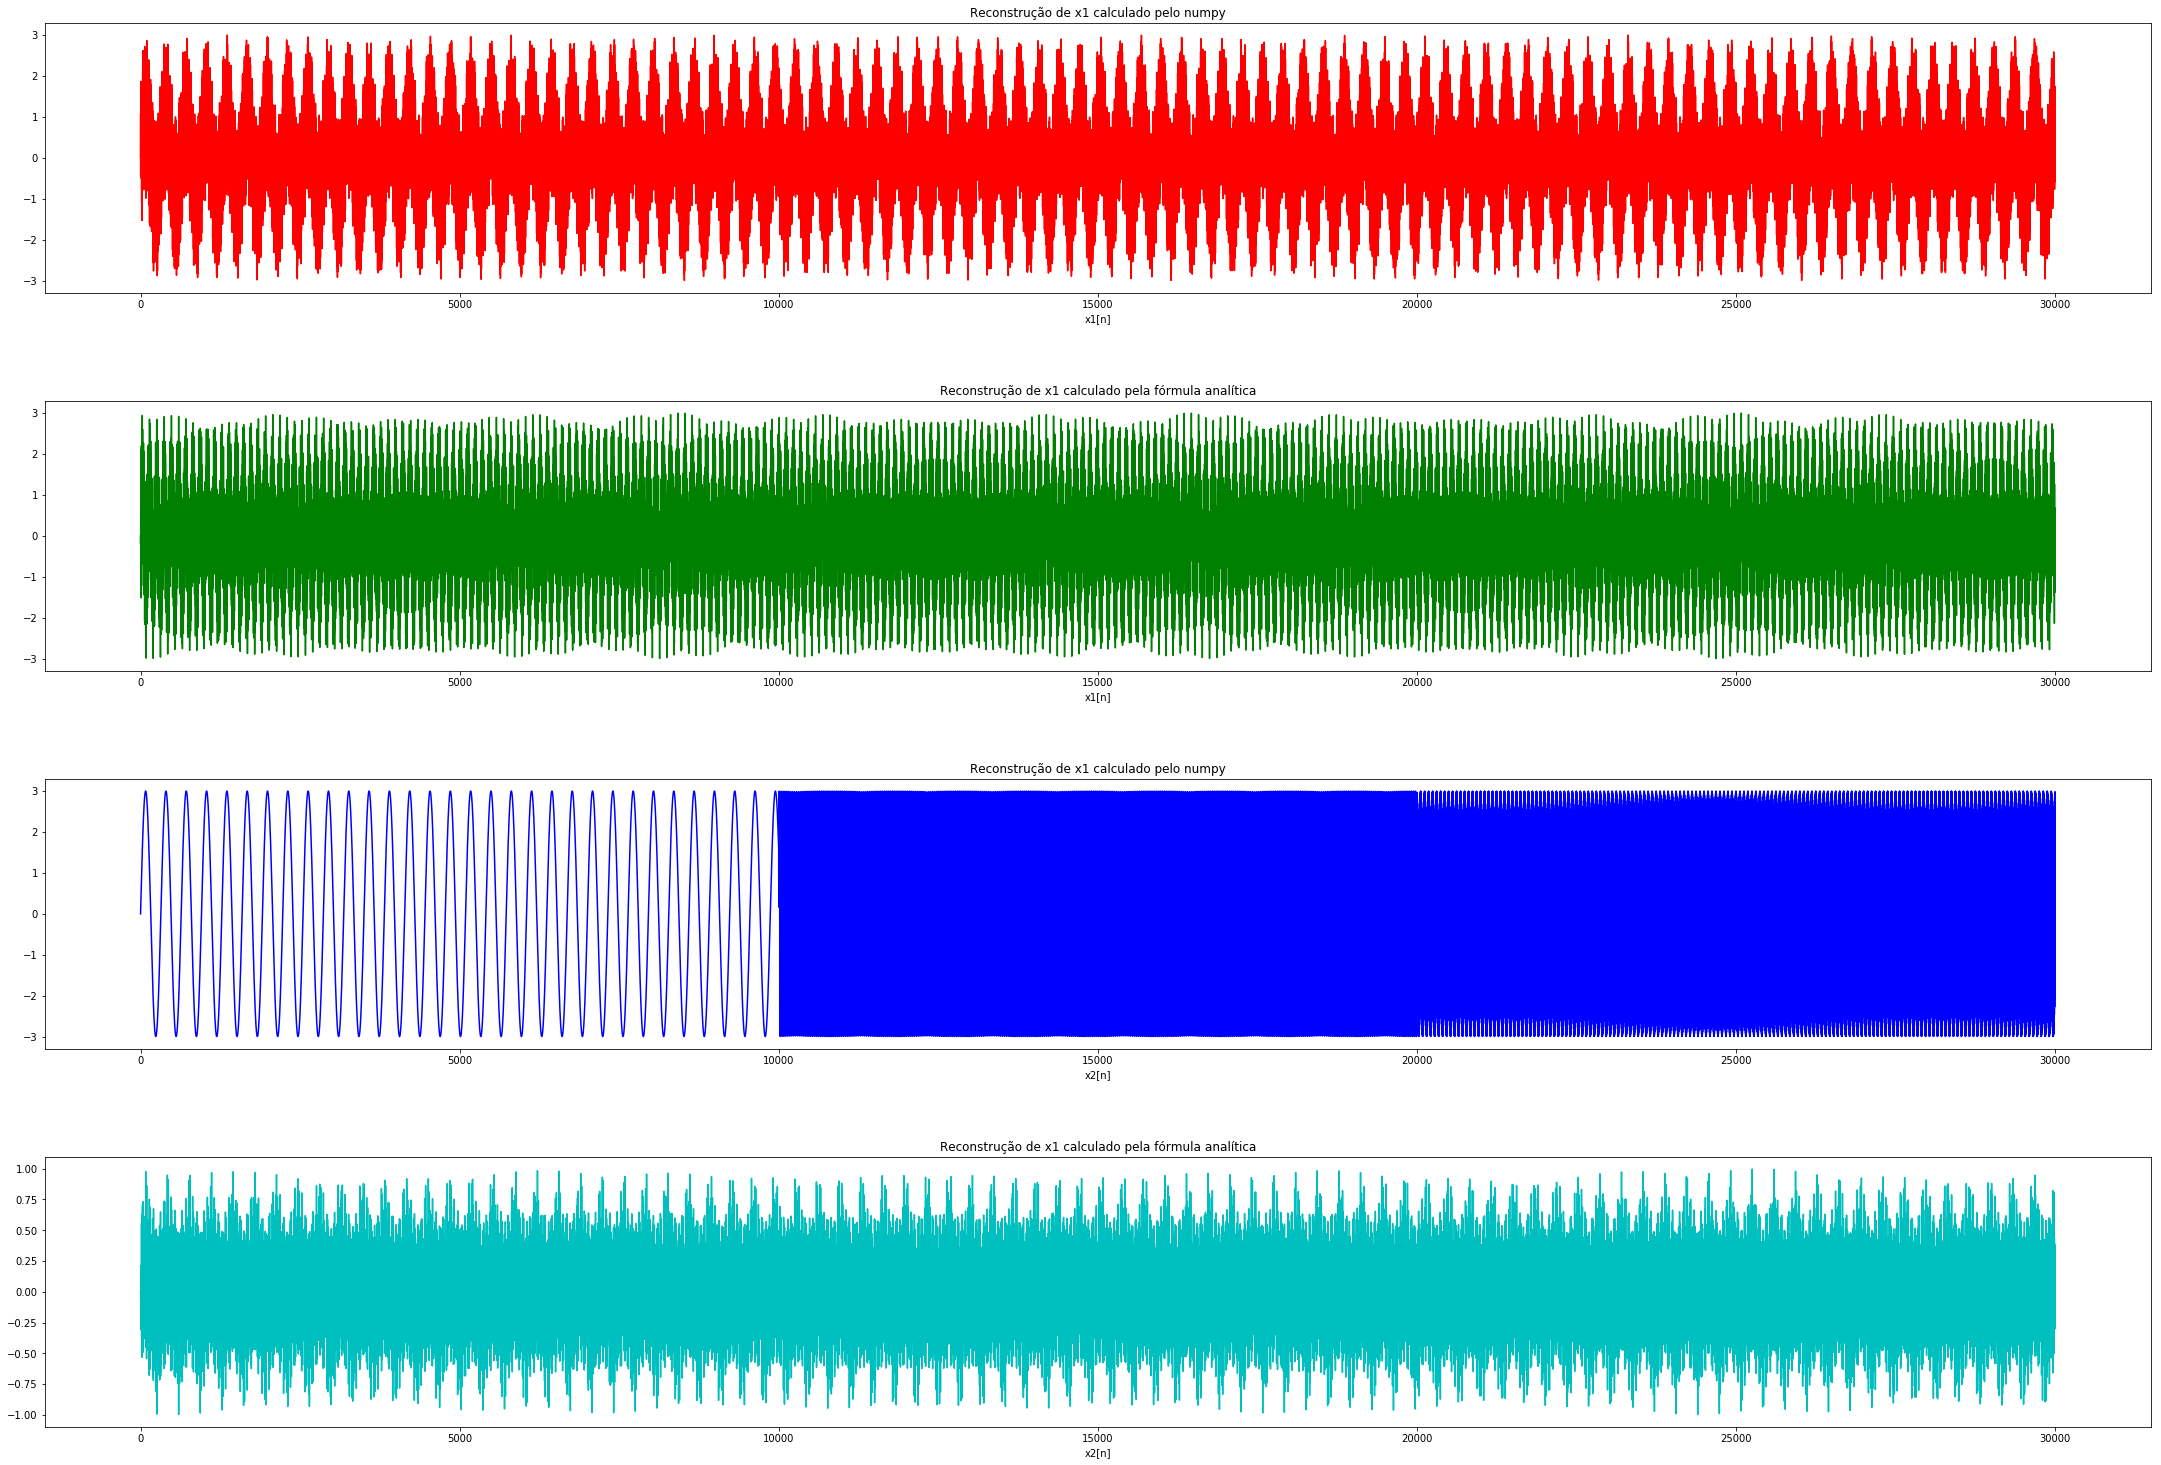

In [9]:
#  Reconstrução de x1FFT
x1_n_reconst_fft = np.fft.ifft(x1FFT)

#  Reconstrução de X1_k(Calculado pela fórmula analítica)
x1_n_reconst_fa = np.fft.ifft(X1_k[0])

#  Reconstrução de x2FFT(Calculado pelo numpy)
x2_n_reconst_fft = np.fft.ifft(x2FFT)

#  Reconstrução de X2_k(Calculado pela fórmula analítica)
x2_n_reconst_fa = np.fft.ifft(X2_k)

t = np.arange(0, len(X1_k[0]))

plt.subplot(4,1,1)
plt.plot(t, x1_n_reconst_fft.real, 'r')
plt.xlabel('x1[n]')
plt.title('Reconstrução de x1 calculado pelo numpy')

plt.subplot(4,1,2)
plt.plot(t, x1_n_reconst_fa.real, 'g')
plt.xlabel('x1[n]')
plt.title('Reconstrução de x1 calculado pela fórmula analítica')

plt.subplot(4,1,3)
plt.plot(t, x2_n_reconst_fft.real, 'b')
plt.xlabel('x2[n]')
plt.title('Reconstrução de x1 calculado pelo numpy')

plt.subplot(4,1,4)
plt.plot(t, x2_n_reconst_fa.real, 'c')
plt.xlabel('x2[n]')
plt.title('Reconstrução de x1 calculado pela fórmula analítica')

plt.subplots_adjust(top=5, right= 5, hspace=0.4)
plt.show()

<h3>f)</h3>

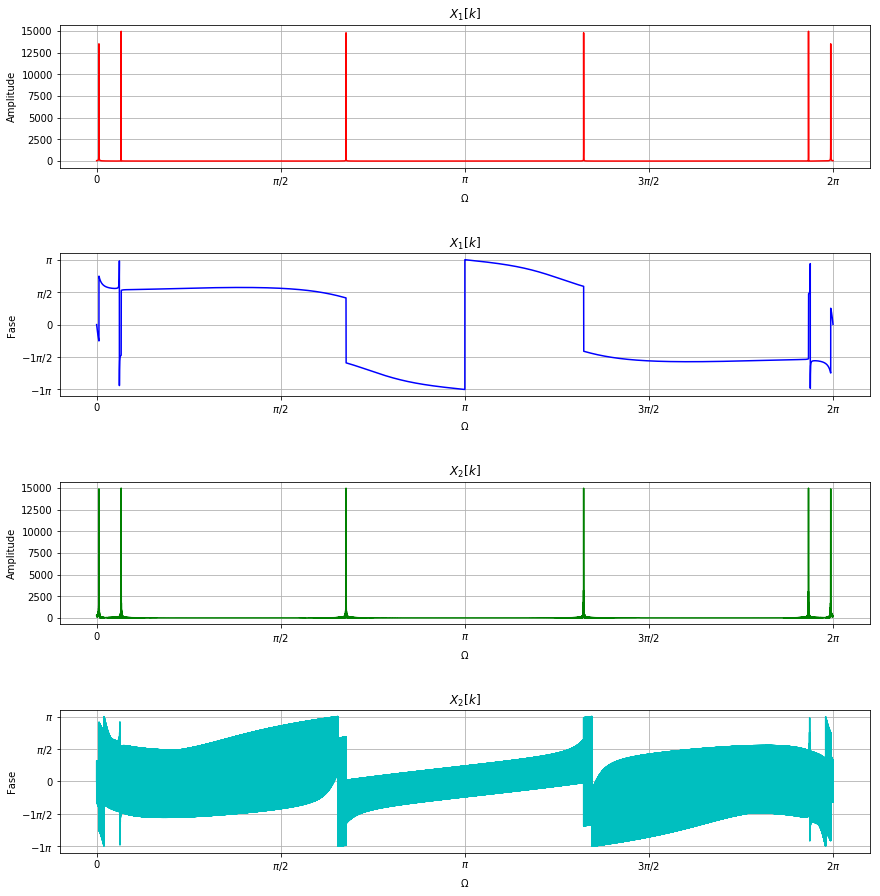

In [10]:
def format_func(value, tick_number):
    # Função para formatar os números do eixo x
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)


amplitude_x1_k = np.abs(x1FFT)
amplitude_x2_k = np.abs(x2FFT)

fase_x1_k = np.angle(x1FFT)
fase_x2_k = np.angle(x2FFT)

# X1_[k]
fig, axes = plt.subplots(4,1)

axes[0].xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[0].grid(True)
axes[0].plot(OmegaX1, amplitude_x1_k, 'r')
axes[0].set_ylabel('Amplitude')
axes[0].set_xlabel(r'$\Omega$')
axes[0].set_title(r'$X_{1}[k]$')

axes[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[1].yaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[1].grid(True)
axes[1].plot(OmegaX1, fase_x1_k, 'b')
axes[1].set_ylabel('Fase')
axes[1].set_xlabel(r'$\Omega$')
axes[1].set_title(r'$X_{1}[k]$')
plt.subplots_adjust(right=2, top=2, hspace=0.6)

axes[2].xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[2].grid(True)
axes[2].plot(OmegaX2, amplitude_x2_k, 'g')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlabel(r'$\Omega$')
axes[2].set_title(r'$X_{2}[k]$')

axes[3].xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[3].yaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
axes[3].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[3].yaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[3].grid(True)
axes[3].plot(OmegaX2, fase_x2_k, 'c')
axes[3].set_ylabel('Fase')
axes[3].set_xlabel(r'$\Omega$')
axes[3].set_title(r'$X_{2}[k]$')
plt.subplots_adjust(right=2, top=3, hspace=0.6)





<h3>g)</h3>

A ideia do filtro <b>passa-faixa</b> consiste em multiplicar o espectro de frequência dos sinais por um vetor do mesmo tamanho composto de $1's$ no intervalo que compreende a frequência a ser mantida e de $0's$ no restante dos componentes.

O código abaixo implementa essa abordagem, gerando os filtros $H_{1}[k], H_{2}[k]$ e $H_{3}[k]$ para as respectivas frequências $f_{1} = 5Hz, f_{2} = 53Hz$ e $f_{3} = 5Hz$

<h4>Espectros de Frequência</h4>

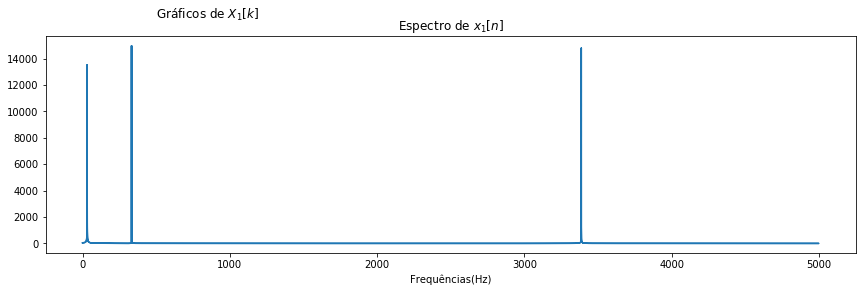

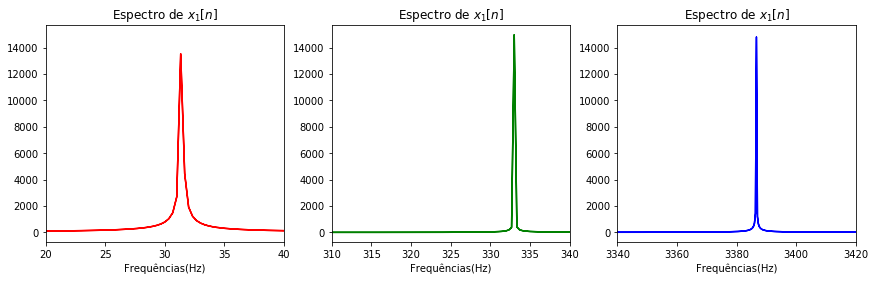

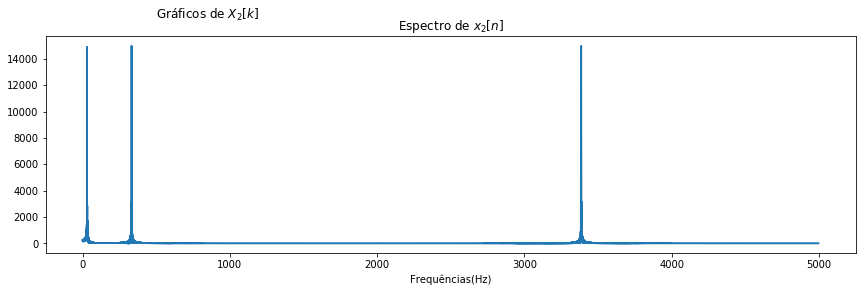

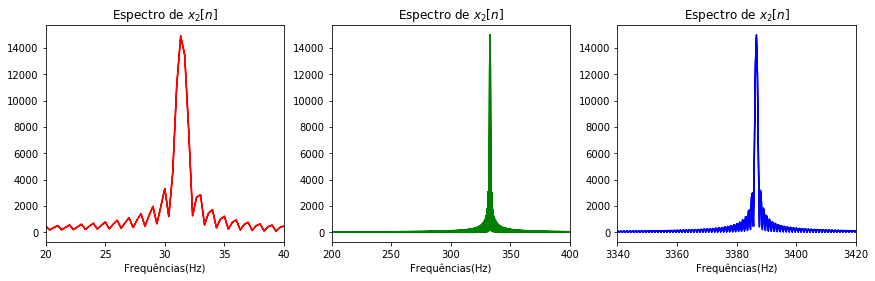

In [11]:
#Gráficos dos espectros
# X1[k]
freqsX1 = np.abs(np.fft.fftfreq(len(x1_n)))*FREQ_AMOSTRAGEM

freqsX2 = np.abs(np.fft.fftfreq(len(x2_n)))*FREQ_AMOSTRAGEM

plt.suptitle('Gráficos de $X_{1}[k]$')
plt.plot(freqsX1, np.abs(x1FFT))
plt.title(r"Espectro de $x_{1}[n]$")
plt.xlabel('Frequências(Hz)')
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,3,1)
plt.plot(freqsX1, np.abs(x1FFT), 'r')
plt.title(r"Espectro de $x_{1}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(20, 40)

plt.subplot(1,3,2)
plt.plot(freqsX1, np.abs(x1FFT), 'g')
plt.title(r"Espectro de $x_{1}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(310, 340)

plt.subplot(1,3,3)
plt.plot(freqsX1, np.abs(x1FFT), 'b')
plt.title(r"Espectro de $x_{1}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(3340, 3420)
plt.subplots_adjust(wspace=0.2, right=2)
plt.show()

# X2[k]
plt.suptitle('Gráficos de $X_{2}[k]$')
plt.plot(freqsX2, np.abs(x2FFT))
plt.title(r"Espectro de $x_{2}[n]$")
plt.xlabel('Frequências(Hz)')
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,3,1)
plt.plot(freqsX2, np.abs(x2FFT), 'r')
plt.title(r"Espectro de $x_{2}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(20, 40)

plt.subplot(1,3,2)
plt.plot(freqsX2, np.abs(x2FFT), 'g')
plt.title(r"Espectro de $x_{2}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(200, 400)

plt.subplot(1,3,3)
plt.plot(freqsX2, np.abs(x2FFT), 'b')
plt.title(r"Espectro de $x_{2}[n]$")
plt.xlabel('Frequências(Hz)')
plt.xlim(3340, 3420)
plt.subplots_adjust(wspace=0.2, right=2)
plt.show()

In [12]:
# Implementação dos filtros
passo = 3
H1k = np.zeros(len(freqsX1))
H2k = np.zeros(len(freqsX1))
H3k = np.zeros(len(freqsX1))

#  H1[k] - filtro passa-faixa para f1
H1k[range(20*passo, 40*passo)] = 1
Y1k = freqsX1 * H1k

#  H2[k] - filtro passa-faixa para f2
H2k[range(310*passo, 340*passo)] = 1
Y2k = freqsX1 * H2k

#  H3[k] - filtro passa-faixa para f3
H3k[range(3340*passo, 3420*passo)] = 1
Y3k = freqsX1 * H3k

<h4>Aplicação dos Filtros</h4>

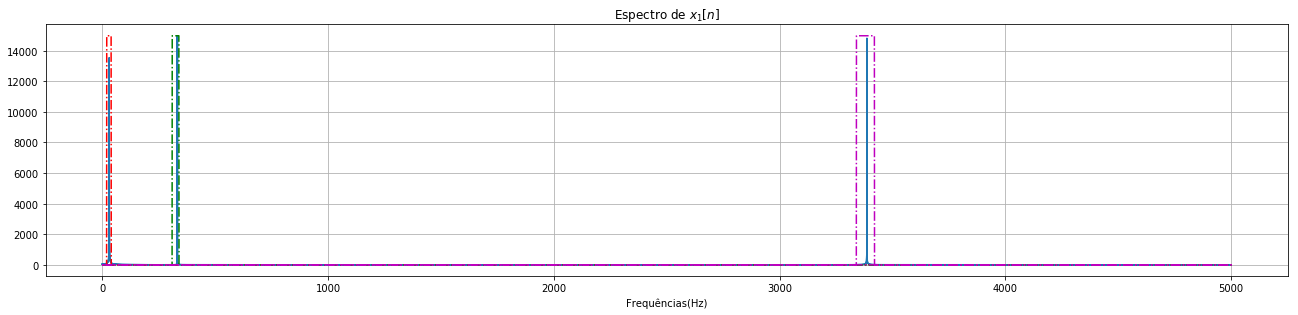

In [13]:

plt.plot(freqsX1, np.abs(x1FFT), freqsX1, H1k*np.max(np.abs(x1FFT)), 'r-.',freqsX1, H2k*np.max(np.abs(x1FFT)), 'g-.', 
         freqsX1, H3k*np.max(np.abs(x1FFT)), 'm-.' )
plt.title(r"Espectro de $x_{1}[n]$")
plt.grid()
plt.xlabel('Frequências(Hz)')
plt.subplots_adjust(top=1, right=3)
plt.show()

<h4>Aplicação do filtro em x_1[n]</h4>

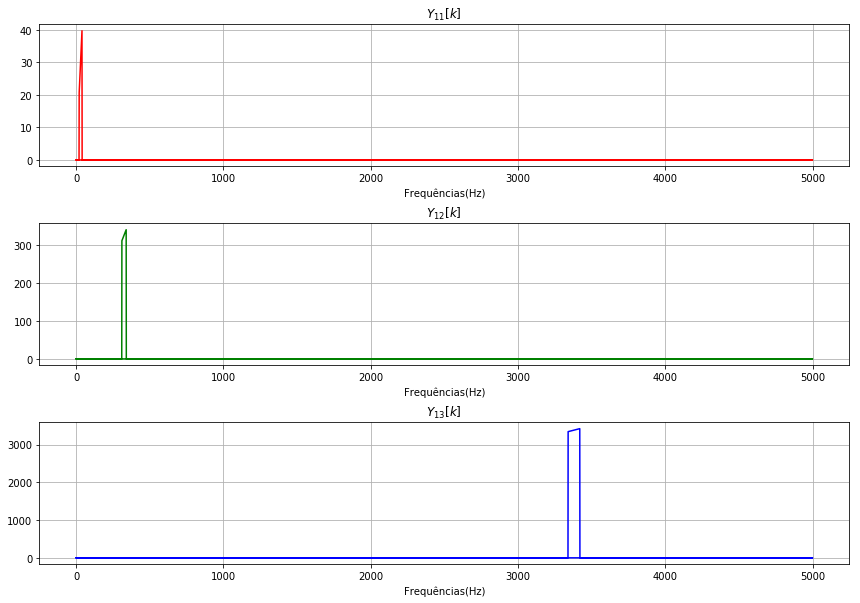

In [14]:
# Gráficos dos sinais passados pelos filtros
# Y1[k]
plt.subplot(3,1,1)
plt.plot(freqsX1, Y1k, 'r')
plt.xlabel('Frequências(Hz)')
plt.grid()
plt.title('$Y_{11}[k]$')

# Y2[k]
plt.subplot(3,1,2)
plt.plot(freqsX1, Y2k, 'g')
plt.xlabel('Frequências(Hz)')
plt.grid()
plt.title('$Y_{12}[k]$')

# Y3[k]
plt.subplot(3,1,3)
plt.plot(freqsX1, Y3k, 'b')
plt.grid()
plt.xlabel('Frequências(Hz)')
plt.title('$Y_{13}[k]$')

plt.subplots_adjust(right=2, top=2, hspace=0.4)
plt.show()

<h4>Aplicação do filtro em x_2[n]</h4>

In [15]:
H1k_2 = np.zeros(len(freqsX1))
H2k_2 = np.zeros(len(freqsX1))
H3k_2 = np.zeros(len(freqsX1))

#  H1[k] - filtro passa-faixa para f1
H1k_2[range(20*passo, 40*passo)] = 1
Y1k_2 = freqsX2 * H1k_2

#  H2[k] - filtro passa-faixa para f2
H2k_2[range(310*passo, 340*passo)] = 1
Y2k_2 = freqsX2 * H2k_2

#  H3[k] - filtro passa-faixa para f3
H3k_2[range(3340*passo, 3420*passo)] = 1
Y3k_2 = freqsX2 * H3k_2

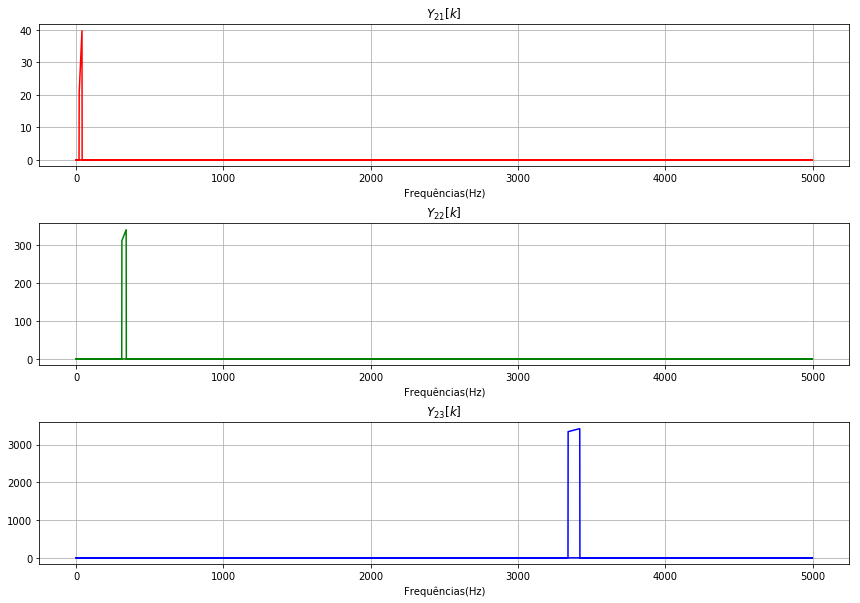

In [16]:
# Gráficos dos sinais passados pelos filtros
# Y1[k]
plt.subplot(3,1,1)
plt.plot(freqsX2, Y1k_2, 'r')
plt.xlabel('Frequências(Hz)')
plt.grid()
plt.title('$Y_{21}[k]$')

# Y2[k]
plt.subplot(3,1,2)
plt.plot(freqsX2, Y2k_2, 'g')
plt.xlabel('Frequências(Hz)')
plt.grid()
plt.title('$Y_{22}[k]$')

# Y3[k]
plt.subplot(3,1,3)
plt.plot(freqsX2, Y3k_2, 'b')
plt.grid()
plt.xlabel('Frequências(Hz)')
plt.title('$Y_{23}[k]$')

plt.subplots_adjust(right=2, top=2, hspace=0.4)
plt.show()

<h3>h)</h3>

Para demonstrar o funcionamento dos filtros, os sinais $x_{1}[n]$ e $x_{2}[n]$ serão reconstruídos a partir de $Y_{1}[k], Y_{2}[k]$ e $Y_{1}[k]$(<i>vide item g)</i>, usando a biblioteca <b>numpy.fft.ifft</b>:

In [17]:
# Reconstrução de x1[n]
x1_h1 = np.fft.ifft(Y1k)
x1_h2 = np.fft.ifft(Y2k)
x1_h3 = np.fft.ifft(Y3k)

# Reconstrução de x2[n]
x2_h1 = np.fft.ifft(Y1k_2)
x2_h2 = np.fft.ifft(Y2k_2)
x2_h3 = np.fft.ifft(Y3k_2)

<h4>Gráficos de x_1[n]</h4>

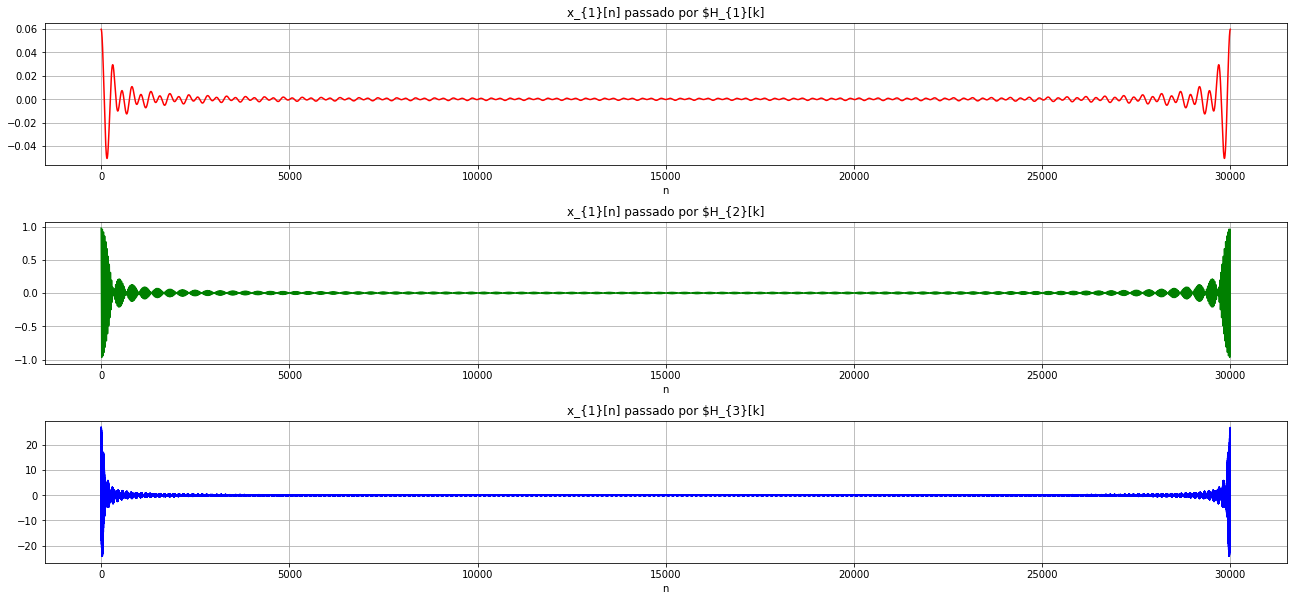

In [18]:
#Gráficos de x_1[n]
n = np.arange(0, len(x1_h1))

plt.subplot(3,1,1)
plt.plot(n, x1_h1.real,'r')
plt.grid()
plt.xlabel('n')
plt.title('x_{1}[n] passado por $H_{1}[k]')

plt.subplot(3,1,2)
plt.plot(n, x1_h2.real, 'g')
plt.grid()
plt.xlabel('n')
plt.title('x_{1}[n] passado por $H_{2}[k]')

plt.subplot(3,1,3)
plt.plot(n, x1_h3.real, 'b')
plt.grid()
plt.xlabel('n')
plt.title('x_{1}[n] passado por $H_{3}[k]')

plt.subplots_adjust(top=2, right=3, hspace=0.4)
plt.show()

<h4>Gráficos de x_2[n]</h4>

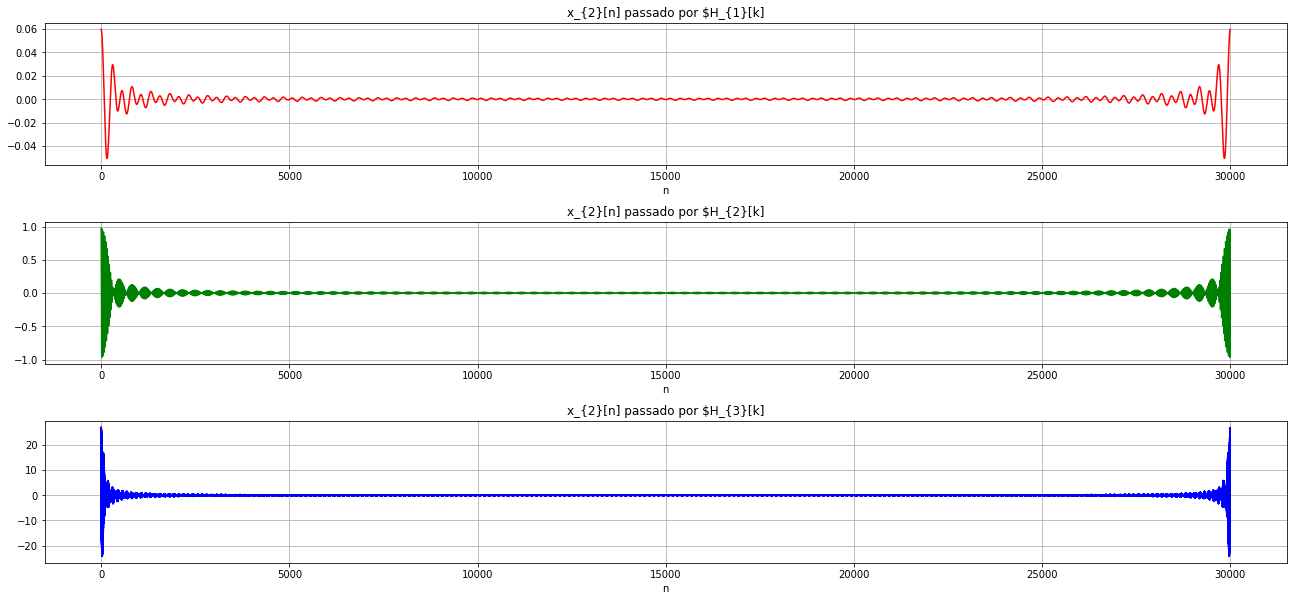

In [19]:
#Gráficos de x_2[n]
n = np.arange(0, len(x1_h1))

plt.subplot(3,1,1)
plt.plot(n, x2_h1.real,'r')
plt.grid()
plt.xlabel('n')
plt.title('x_{2}[n] passado por $H_{1}[k]')

plt.subplot(3,1,2)
plt.plot(n, x2_h2.real, 'g')
plt.grid()
plt.xlabel('n')
plt.title('x_{2}[n] passado por $H_{2}[k]')

plt.subplot(3,1,3)
plt.plot(n, x2_h3.real, 'b')
plt.grid()
plt.xlabel('n')
plt.title('x_{2}[n] passado por $H_{3}[k]')

plt.subplots_adjust(top=2, right=3, hspace=0.4)
plt.show()

A operação de filtragem no domínio das amostras é mais complicada de ser implementada numericamente devido às computações de <b>convolução</b> que, dependendo do sinal, tornam-se complexas demais.  Quando passamos para o domínio da frequência, pelas propriedades da DFTF(e consequentemente, da DFT), tais operações simplificam-se, na medida em que se transformam em uma multiplicação da transformada da função do sinal pela transformada da função de filtragem.

<h3>Questão 2:</h3>

Conforme dita o <b>Teorema de Nyquist</b>, a frequência de amostragem deve corresponder ao dobro da maior frequência do espectro do sinal amostrado para que haja a representação de todas as frequências componentes, sem que haja o fenômeno de <i><b>aliasing</b></i>.  

Da observação feita no scilab temos que a maior frequência encontrada é de aproximadamente 5200 Hz(após essa este valor não há praticamente frequências consideradas relevantes).  Assim:

$$F_{s} = 2 \times F_{max} = 2  \times 5.200 = 10.400Hz$$

Dessa forma podemos amostrar o sinal com este falor de $F_{s}$, procedimento conhecido como <i><b>downsampling</b></i>, onde será retirada uma amostra a cada $10^{-4}s$ e todo espectro estará representado.  O arquivo contendo o novo sinal amostrado encontra-se em anexo.


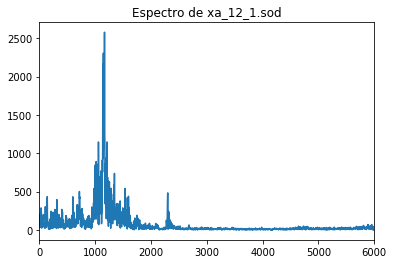

In [21]:
xa = thinkdsp.read_wave('xa_12_1.wav')
intervalo = len(xa)/264600

xa2 = xa.ys[range(0, int(len(xa)/2))]
k = np.arange(0, len(xa2)) / intervalo

Xk = np.fft.fft(xa2)

plt.plot(k, np.abs(Xk))
plt.xlim(0, 6000)
plt.title('Espectro de xa_12_1.sod')
plt.show()
